Завантаження файлу csv в colab

In [1]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving bestsellers with categories.csv to bestsellers with categories.csv



**Прочитайте csv файл (використовуйте функцію read_csv)** **bold text**



In [2]:
import pandas as pd

In [6]:
df = pd.read_csv("bestsellers with categories.csv")

Виведіть перші п'ять рядків (використовується функція head)

In [7]:
df.head(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [8]:
df.shape

(550, 7)

Про скільки книг зберігає дані датасет?
**Відповідь: 550**

Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style).
А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

In [9]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head(3)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


**Первинне дослідження даних**





Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)


In [10]:
df.isna().sum()

,0
name,0
author,0
user_rating,0
reviews,0
price,0
year,0
genre,0


Чи є в якихось змінних пропуски? Відповідь: **ні**)



Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [11]:
df.nunique()

,0
name,351
author,248
user_rating,14
reviews,346
price,40
year,11
genre,2


In [ ]:
df['genre'].nunique()

2

In [12]:
pd.unique(df['genre'])

array(['Non Fiction', 'Fiction'], dtype=object)

In [13]:
list(pd.unique(df['genre']))

['Non Fiction', 'Fiction']

Відповідь: **'Non Fiction', 'Fiction'**

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

<Axes: title={'center': 'Розподіл цін'}, ylabel='Frequency'>

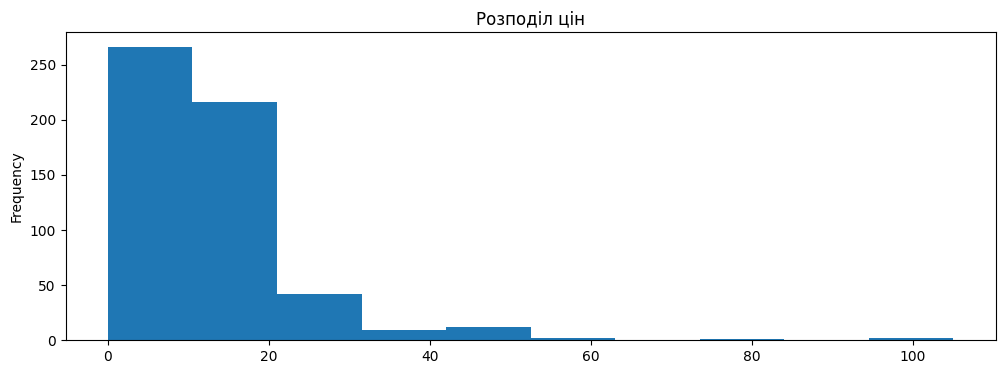

In [14]:
df['price'].plot(figsize = (12,4), title = "Розподіл цін" , kind='hist')

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [15]:
df['price'].max()

105

In [16]:
df['price'].min()

0

In [17]:
df['price'].mean()

13.1

In [18]:
df['price'].median()

11.0

Максимальна ціна? **Відповідь:105**
Мінімальна ціна? **Відповідь: 0**
Середня ціна? **Відповідь: 13.1**
Медіанна ціна? **Відповідь: 11.0**

**Пошук та сортування даних**

Відповідь: Який рейтинг у датасеті найвищий? **Відповідь:4.9**


In [19]:
print (f"Найвищий рейтинг:" , df['user_rating'].max())

Найвищий рейтинг: 4.9


Відповідь: Скільки книг мають такий рейтинг?** Відповідь:52**

In [20]:
max_rating = df['user_rating'].max()
max_rating_count = df['user_rating'].value_counts()[max_rating]
print (max_rating_count)


52



Відповідь: Яка книга має найбільше відгуків? Відповідь:


In [21]:
df.sort_values(by ="reviews",ascending=False).iloc[0]['name']

'Where the Crawdads Sing'

In [22]:
df[df['reviews'] == df['reviews'].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? **Відповідь:** **Publication Manual of the American Psychological Association, 6th Edition**

In [23]:

top50 = df[df['year'] == 2015].sort_values(by ="user_rating",ascending=False)[:50]

print(top50.sort_values(by ="price",ascending=False).iloc[0]["name"])

Publication Manual of the American Psychological Association, 6th Edition


Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:

In [24]:
top_50 = df[(df['year'] == 2010) & (df['genre'] == "Fiction")].sort_values(by ="user_rating", ascending=False)[:50]
top_50.shape[0]

20


Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? **Відповідь:1**

In [25]:
df_1 = df[ (df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]) ) ]
df_1.shape[0]

1



І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
Відповідь: Яка книга остання у відсортованому списку? Відповідь:

In [ ]:
df_tmp = df[ (df['year'] == 2015) & (df['price'] < 8) ].sort_values(by=["price","user_rating"],ascending=[True, False])
df_tmp.tail()

,name,author,user_rating,reviews,price,year,genre
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


**Агрегування даних та з'єднання таблиць**

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [29]:
df[["genre","price"]].groupby("genre").agg(['min', 'max'])

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

Максимальна ціна для жанру Fiction: **Відповідь: 82**

Мінімальна ціна для жанру Fiction: **Відповідь: 0**

Максимальна ціна для жанру Non Fiction: **Відповідь: 105**

Мінімальна ціна для жанру Non Fiction: **Відповідь: 0**

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [49]:
df_count_book = df[['name','author']].groupby('author').agg('count')
print (df_count_book)

                            name
author                          
Abraham Verghese               2
Adam Gasiewski                 1
Adam Mansbach                  1
Adir Levy                      1
Admiral William H. McRaven     1
...                          ...
Walter Isaacson                3
William Davis                  2
William P. Young               2
Wizards RPG Team               3
Zhi Gang Sha                   2

[248 rows x 1 columns]


Якої розмірності вийшла таблиця? **Відповідь: 248 х 1**

In [47]:
df_count_book.idxmax().iloc[0]

'Jeff Kinney'


Який автор має найбільше книг? **Відповідь: Jeff Kinney**

In [46]:
df_count_book.loc[df_count_book.idxmax()].iat[0,0]

12

Скільки книг цього автора? **Відповідь: 12**

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [53]:
df_mean_rating = df [['author', 'user_rating']].groupby('author').agg('mean').sort_values(by= 'user_rating')
print (df_mean_rating)

                    user_rating
author                         
Donna Tartt                 3.9
Gillian Flynn               4.0
Muriel Barbery              4.0
Gallup                      4.0
Ian K. Smith M.D.           4.1
...                         ...
Lin-Manuel Miranda          4.9
Patrick Thorpe              4.9
Nathan W. Pyle              4.9
Bill Martin Jr.             4.9
Jill Twiss                  4.9

[248 rows x 1 columns]


In [54]:
df_mean_rating.idxmin().iloc[0]

'Donna Tartt'

In [55]:
df_mean_rating.min().iloc[0]

3.9

У якого автора середній рейтинг мінімальний? Відповідь: **Donna Tartt**

Який у цього автора середній рейтинг? **Відповідь: 3,9**






З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)



In [65]:
df_union = pd.concat([df_count_book,df_mean_rating], axis = 1)
df_union.columns = ['count', 'a_rating']
df_union.head()

,count,a_rating
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7


In [66]:
df_sort = df_union.sort_values(['count' , 'a_rating'], ascending=True)
df_sort.head()

,count,a_rating
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2


In [69]:
df_sort.index[0]

'Muriel Barbery'

Який автор перший у списку? Відповідь: **Muriel Barbery**

**Візуалізація**
Для кожного з попередніх завдань додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

Не забудьте в Jupyter файл додати директиву %matplotlib inline, щоб графіки будувалися всередині документа.

In [89]:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

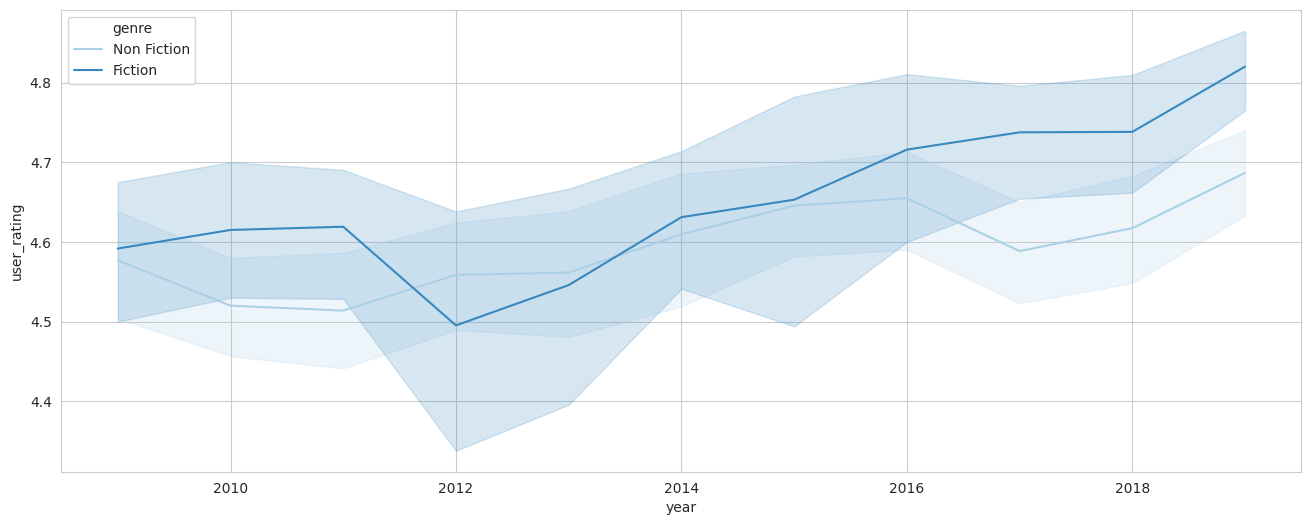

In [111]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x="year", y="user_rating", hue="genre", palette = 'Blues')
plt.show()

<ipython-input-131-718afb73bfb2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="year", y="price", palette= 'dark')


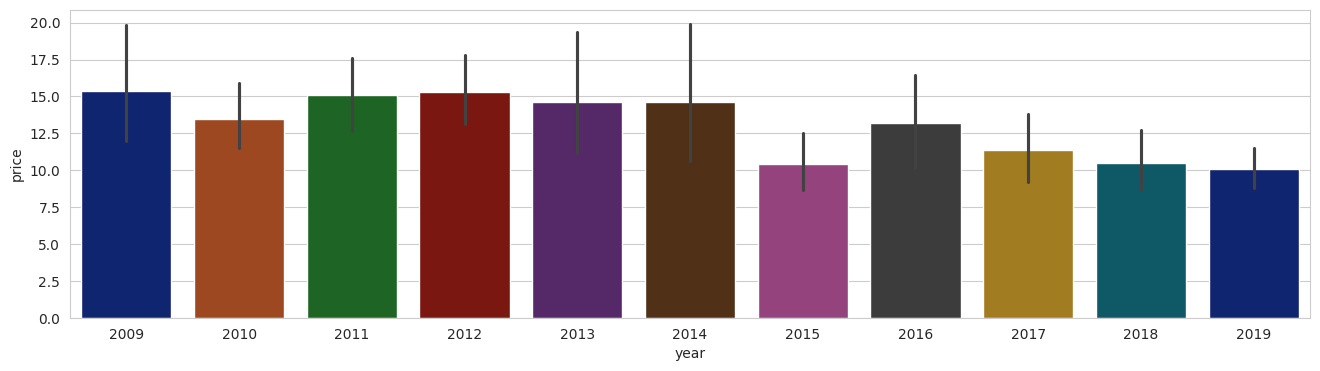

In [131]:
plt.figure(figsize=(16,4))
sns.barplot(data=df, x="year", y="price", palette= 'dark')
plt.show()

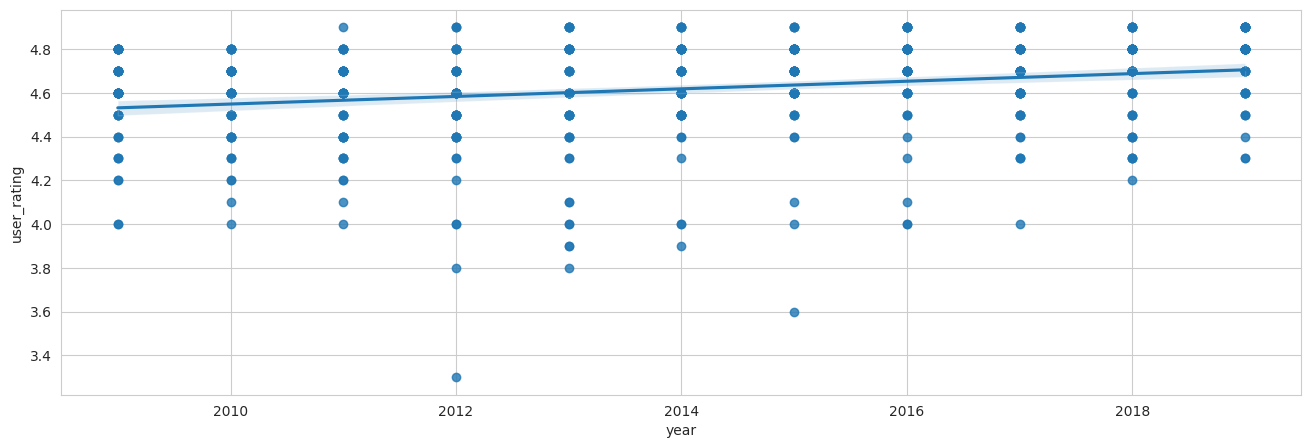

In [151]:
plt.figure(figsize=(16,5))
sns.regplot(x="year", y="user_rating", data=df)
plt.show()

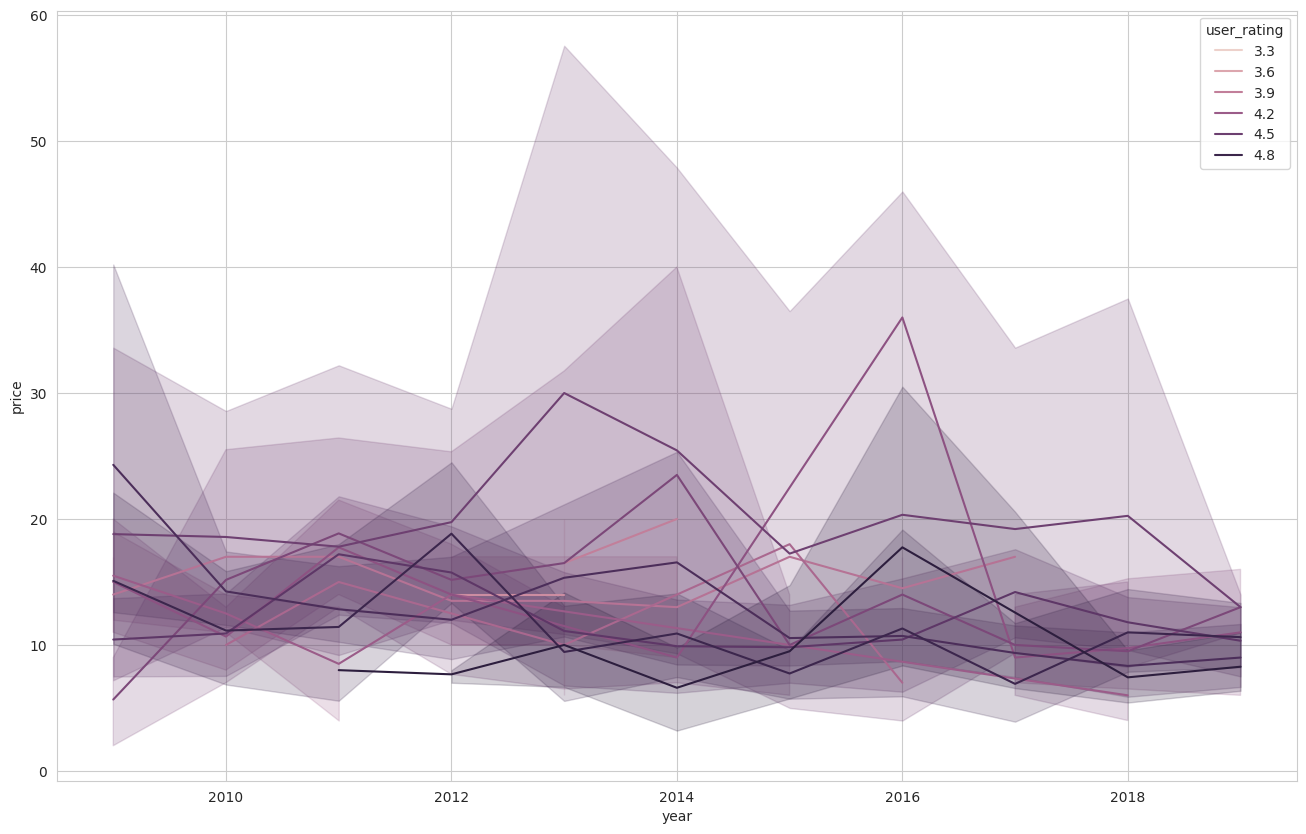

In [149]:

plt.figure(figsize=(16,10))
sns.lineplot(x="year", y="price", hue="user_rating", data=df)
plt.show()
